<font color='red' size=16> Analyzing and Visualizing Movie Data <font>


<font color='Darkblue'> <h3><strong>Movie Dataset Analysis Report</strong></h3></font>

<font color='green'> <h4><strong>1. Introduction</strong></h4></font>

<ul><li><p><strong>Objective:</strong><br>To explore the dataset and derive insights into trends, correlations, and relationships in the movie industry.</p></li><li><p><strong>Dataset Overview:</strong></p><ul><li>Number of records: 36.</li><li>Key columns: Movie Title, Industry, Release Year, IMDB Rating, Studio, Budget, Revenue.</li></ul></li></ul>

In [973]:
import pandas as pd

In [974]:
df = pd.read_csv("D:\Dec'24\DSCourse\data\movies_data.csv")
df.head()

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.0,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD


In [975]:
df

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,1.00,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.00,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.00,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.00,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.00,670.0,Millions,USD
5,111,The Shawshank Redemption,Hollywood,English,1994,9.3,Castle Rock Entertainment,25.00,73.3,Millions,USD
6,113,Interstellar,Hollywood,English,2014,8.6,Warner Bros. Pictures,165.00,701.8,Millions,USD
7,115,The Pursuit of Happyness,Hollywood,English,2006,8.0,Columbia Pictures,55.00,307.1,Millions,USD
8,116,Gladiator,Hollywood,English,2000,8.5,Universal Pictures,103.00,460.5,Millions,USD
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.00,2202.0,Millions,USD


<font color='green'> <h4><strong>2. Data Cleaning and Preprocessing</strong></h4></font>
<ul><li>Handled missing values in key columns (<code>IMDB Rating</code>, <code>Studio</code>):<ul><li>Filled <code>Studio</code> with mode based on the <code>Industry</code>.</li><li>Filled <code>IMDB Rating</code> with the mean value of the column.</li></ul></li><li>Removed duplicates and standardized categorical columns like <code>Industry</code> and <code>Language</code>.</li></ul>

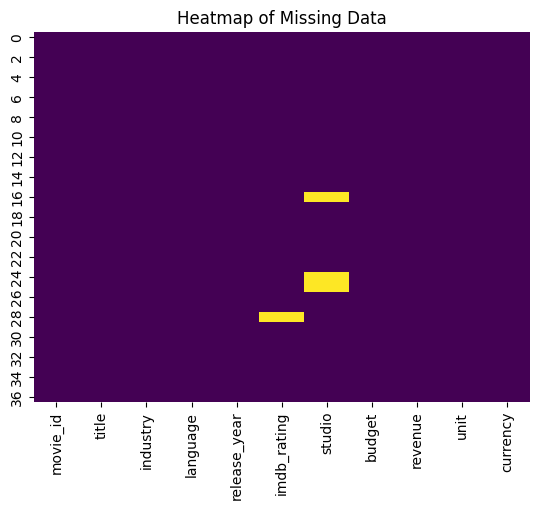

In [976]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.show()


In [977]:
# checking count of null valueas column wise

print(df.isnull().sum())

movie_id        0
title           0
industry        0
language        0
release_year    0
imdb_rating     1
studio          3
budget          0
revenue         0
unit            0
currency        0
dtype: int64


In [978]:
# checking industry of null imdb rating

df[df.imdb_rating.isnull()]['industry']

28    Bollywood
Name: industry, dtype: object

In [979]:
df.replace('Vinod Chopra Productions', 'Vinod Chopra Films', inplace=True)

In [980]:
# fill null imdb rating with mean imdb rating of respective industry (i.e Bollywood)
df.fillna({
    'imdb_rating' : (df[df.industry == 'Bollywood']['imdb_rating'].mean())
})

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.40000,Hombale Films,1.00,12.5,Billions,INR
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.00000,Marvel Studios,200.00,954.8,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.80000,Marvel Studios,165.00,644.8,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.90000,Marvel Studios,180.00,854.0,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.80000,Marvel Studios,250.00,670.0,Millions,USD
5,111,The Shawshank Redemption,Hollywood,English,1994,9.30000,Castle Rock Entertainment,25.00,73.3,Millions,USD
6,113,Interstellar,Hollywood,English,2014,8.60000,Warner Bros. Pictures,165.00,701.8,Millions,USD
7,115,The Pursuit of Happyness,Hollywood,English,2006,8.00000,Columbia Pictures,55.00,307.1,Millions,USD
8,116,Gladiator,Hollywood,English,2000,8.50000,Universal Pictures,103.00,460.5,Millions,USD
9,117,Titanic,Hollywood,English,1997,7.90000,Paramount Pictures,200.00,2202.0,Millions,USD


In [981]:
df[df.studio.isnull()]      # find null studios  

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
16,124,Parasite,Hollywood,English,2019,8.5,NaN,15.5,263.1,Millions,USD
24,110,Bajirao Mastani,Bollywood,Hindi,2015,7.2,NaN,1.4,3.5,Billions,INR
25,128,Taare Zameen Par,Bollywood,Hindi,2007,8.3,NaN,120.0,1350.0,Millions,INR


In [982]:
# find industry wise mode(most frequent) for studio 

print(df[df.industry == 'Bollywood'].studio.mode())
print(df[df.industry == 'Hollywood'].studio.mode())

0    Vinod Chopra Films
Name: studio, dtype: object
0    Marvel Studios
Name: studio, dtype: object


In [983]:
# fill missing studio with mode of respective industry

def fillNull(row):
    if row['industry'] == 'Bollywood':
        return 'Vinod Chopra Films'
    elif row['industry'] == 'Hollywood':
        return 'Marvel Studios'
    else:
        return row['studio']
    
df['studio'] = df.apply(lambda row: fillNull(row) if pd.isnull(row['studio']) else row['studio'], axis=1)

In [984]:
# convert all units with standard million
def convert(row):
    if row['unit'] == 'Billions':
        row['unit'] = 'Millions'
        row['budget'] = row['budget'] * 1000
        row['revenue'] = row['revenue'] * 1000
        return row
    elif row['unit'] == 'Thousands':
        row['unit'] = 'Millions'
        row['budget'] = row['budget'] * 0.001
        row['revenue'] = row['revenue'] * 0.001
        return row

    else:
        return row

df = df.apply(lambda row: convert(row), axis=1)


In [985]:
# convert all units with standard USD with rate at 85 inr to usd
def convert(row):
    if row['currency'] == 'INR':
        row['currency'] = 'USD'
        row['budget'] = row['budget'] * 0.012
        row['revenue'] = row['revenue'] * 0.012
        return row
    else:
        return row
    
df = df.apply(lambda row: convert(row), axis=1)


In [986]:
df  # cleaned data with no null values

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.00,150.000,Millions,USD
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.00,954.800,Millions,USD
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.00,644.800,Millions,USD
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.00,854.000,Millions,USD
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.00,670.000,Millions,USD
5,111,The Shawshank Redemption,Hollywood,English,1994,9.3,Castle Rock Entertainment,25.00,73.300,Millions,USD
6,113,Interstellar,Hollywood,English,2014,8.6,Warner Bros. Pictures,165.00,701.800,Millions,USD
7,115,The Pursuit of Happyness,Hollywood,English,2006,8.0,Columbia Pictures,55.00,307.100,Millions,USD
8,116,Gladiator,Hollywood,English,2000,8.5,Universal Pictures,103.00,460.500,Millions,USD
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.00,2202.000,Millions,USD


In [987]:
df['profit'] = df.revenue - df.budget
df

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.00,150.000,Millions,USD,138.000
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.00,954.800,Millions,USD,754.800
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.00,644.800,Millions,USD,479.800
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.00,854.000,Millions,USD,674.000
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.00,670.000,Millions,USD,420.000
5,111,The Shawshank Redemption,Hollywood,English,1994,9.3,Castle Rock Entertainment,25.00,73.300,Millions,USD,48.300
6,113,Interstellar,Hollywood,English,2014,8.6,Warner Bros. Pictures,165.00,701.800,Millions,USD,536.800
7,115,The Pursuit of Happyness,Hollywood,English,2006,8.0,Columbia Pictures,55.00,307.100,Millions,USD,252.100
8,116,Gladiator,Hollywood,English,2000,8.5,Universal Pictures,103.00,460.500,Millions,USD,357.500
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.00,2202.000,Millions,USD,2002.000


<font color='green'><h3><strong>3. Key Insights</strong></h3></font>
<h5><strong>3.1 Industry Analysis</strong></h5>
<ul><li>Most prominent industries in the dataset: <b>Hollywood</b>.</li><li>Top-performing industry in terms of revenue: <b>Hollywood</b>.</li><li>Average revenue by industry:<ul><li> Hollywood:<b> 929 Million USD.</b> </li><li> Bollywood:<b> 57 Million USD.</b> </li></ul></li></ul>

<h5><strong>3.2 IMDB Ratings</strong></h5>
<ul><li>Average IMDB Rating: <ul><li>Hollywood:<b> 8.1</b> </li><li>Bollywood:<b> 7.7</b> </li></ul></li><li>Movies with highest ratings: <ul><li>Hollywood:<b> The Shawshank Redemption </b> </li><li>Bollywood:<b> K.G.F: Chapter 2 </b> </li></ul></li></ul>


<h5><strong>3.3 Revenue and Budget Trends</strong></h5>
<ul><li>Average budget for movies: <b>89.0</b></li><li>Average revenue for movies:<b>528.35</b> </li><li>Highest-grossing movie: <b>Avatar</b> with a revenue of <b> 2847.0</b></li></ul>


<h5><strong>3.4 Studio Analysis</strong></h5>
<ul><li>Top 3 studios producing the highest revenue:<ol><li><b>Marvel Studios</b></li><li><b>20th Century Fox</b></li><li><b>Paramount Pictures</b></li></ol></li></ul>


In [988]:
# General Analysis

# Industry wise Imdb rating
print('Bollywood:')
print('Minimun Imdb rating :', df[df.industry == 'Bollywood'].imdb_rating.min())
print('Maximum Imdb rating :', df[df.industry == 'Bollywood'].imdb_rating.max())
print('Average Imdb rating :', df[df.industry == 'Bollywood'].imdb_rating.mean().round(1))
print('Average Revenue :', df[df.industry == 'Bollywood'].revenue.mean().round())


print()
print('Hollywood:')
print('Minimun Imdb rating :', df[df.industry == 'Hollywood'].imdb_rating.min())
print('Maximum Imdb rating :', df[df.industry == 'Hollywood'].imdb_rating.max())
print('Average Imdb rating :', df[df.industry == 'Hollywood'].imdb_rating.mean().round(1))
print('Average Revenue :', df[df.industry == 'Hollywood'].revenue.mean().round())




Bollywood:
Minimun Imdb rating : 1.9
Maximum Imdb rating : 8.4
Average Imdb rating : 7.7
Average Revenue : 57.0

Hollywood:
Minimun Imdb rating : 6.8
Maximum Imdb rating : 9.3
Average Imdb rating : 8.1
Average Revenue : 929.0


In [989]:
# Top 5 movies of Bollywood by imdb rating
df[df.industry == 'Bollywood'].sort_values(by='imdb_rating', ascending=False).head(5)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.00,150.000,Millions,USD,138.000
22,108,3 Idiots,Bollywood,Hindi,2009,8.4,Vinod Chopra Films,6.60,48.000,Millions,USD,41.400
32,140,Shershaah,Bollywood,Hindi,2021,8.4,Dharma Productions,6.00,11.400,Millions,USD,5.400
25,128,Taare Zameen Par,Bollywood,Hindi,2007,8.3,Vinod Chopra Films,1.44,16.200,Millions,USD,14.760
29,135,The Kashmir Files,Bollywood,Hindi,2022,8.3,Zee Studios,3.00,40.908,Millions,USD,37.908


In [990]:
# Top 5 movies of Hollywood by imdb rating
df[df.industry == 'Hollywood'].sort_values(by='imdb_rating', ascending=False).head(5)


,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
5,111,The Shawshank Redemption,Hollywood,English,1994,9.3,Castle Rock Entertainment,25.0,73.3,Millions,USD,48.3
12,120,The Godfather,Hollywood,English,1972,9.2,Paramount Pictures,7.2,291.0,Millions,USD,283.8
13,121,The Dark Knight,Hollywood,English,2008,9.0,Syncopy,185.0,1006.0,Millions,USD,821.0
14,122,Schindler's List,Hollywood,English,1993,9.0,Universal Pictures,22.0,322.2,Millions,USD,300.2
6,113,Interstellar,Hollywood,English,2014,8.6,Warner Bros. Pictures,165.0,701.8,Millions,USD,536.8


In [991]:
# Average budget for movies
# Average revenue for movies
# Highest-grossing movie

print("Average budget for movies:", df.budget.mean().round(2))
print("Average revenue for movies:", df.revenue.mean().round(2))
print(f"Highest-grossing movie: {df[df.revenue == df.revenue.max()].title.values} with a revenue of {df.revenue.max()}", )

Average budget for movies: 89.0
Average revenue for movies: 528.35
Highest-grossing movie: ['Avatar'] with a revenue of 2847.0


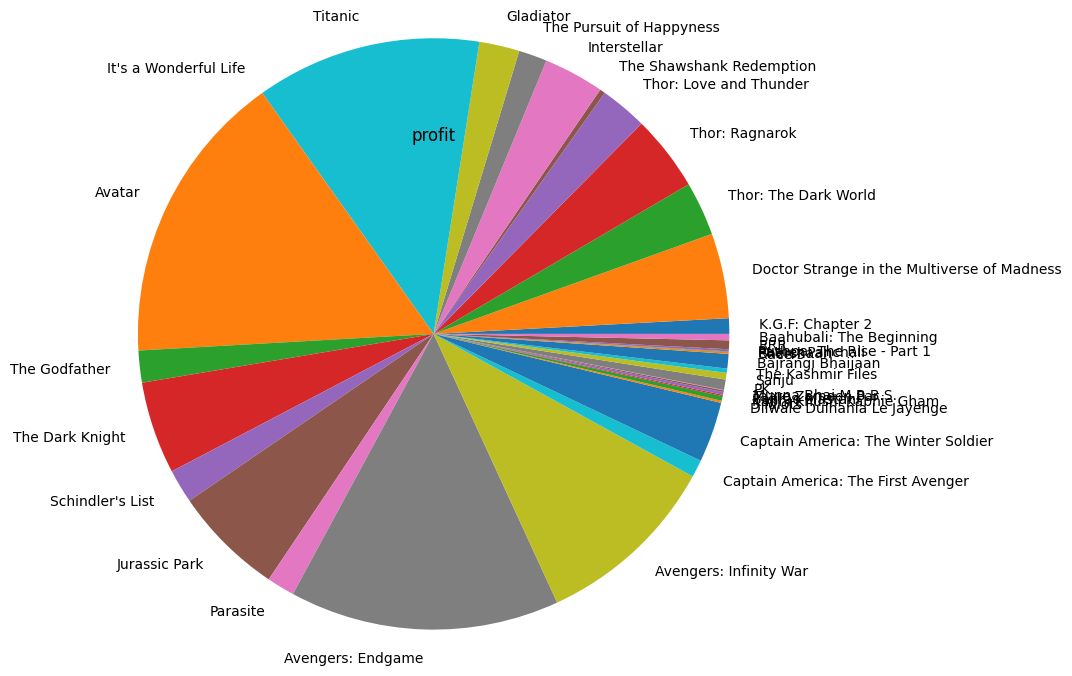

In [992]:
from matplotlib import pyplot

plt.pie(df['profit'], labels=df['title'], radius=2)
plt.title(label='profit')
plt.show()

In [993]:
# count of movies made by indiviual studios
df.groupby('studio')['title'].count()

studio
20th Century Fox             1
Arka Media Works             1
Castle Rock Entertainment    1
Columbia Pictures            1
DVV Entertainment            1
Dharma Productions           2
Government of West Bengal    1
Hombale Films                1
Liberty Films                1
Marvel Studios               9
Mythri Movie Makers          1
Paramount Pictures           2
Salman Khan Films            2
Syncopy                      1
Universal Pictures           3
Vinod Chopra Films           6
Warner Bros. Pictures        1
Yash Raj Films               1
Zee Studios                  1
Name: title, dtype: int64

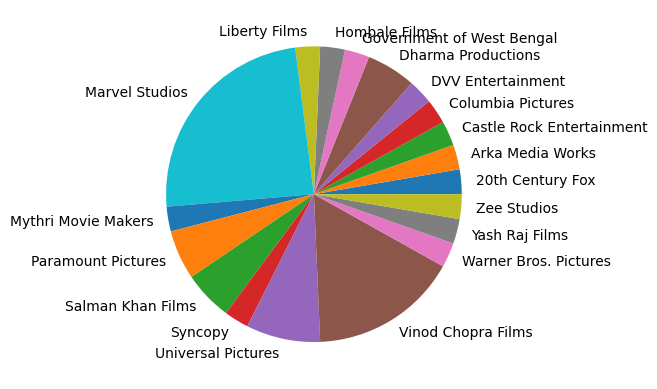

In [994]:
pyplot.pie(df.groupby('studio')['title'].count(), labels=df.groupby('studio')['title'].count().index)
plt.show()


In [995]:
# Top 5 Bollywood movies by revenue
df[df.industry == 'Bollywood'].sort_values(by='revenue', ascending=False).head(5)



,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.0,150.00,Millions,USD,138.00
35,133,RRR,Bollywood,Telugu,2022,8.0,DVV Entertainment,66.0,144.00,Millions,USD,78.00
30,136,Bajrangi Bhaijaan,Bollywood,Hindi,2015,8.1,Salman Khan Films,10.8,140.28,Millions,USD,129.48
27,130,PK,Bollywood,Hindi,2014,8.1,Vinod Chopra Films,10.2,102.48,Millions,USD,92.28
36,134,Baahubali: The Beginning,Bollywood,Telugu,2015,8.0,Arka Media Works,21.6,78.00,Millions,USD,56.40


In [996]:
# Top 5 hollywood movies by revenue
df[df.industry == 'Hollywood'].sort_values(by='revenue', ascending=False).head(5)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
11,119,Avatar,Hollywood,English,2009,7.8,20th Century Fox,237.0,2847.0,Millions,USD,2610.0
17,125,Avengers: Endgame,Hollywood,English,2019,8.4,Marvel Studios,400.0,2798.0,Millions,USD,2398.0
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.0,2202.0,Millions,USD,2002.0
18,126,Avengers: Infinity War,Hollywood,English,2018,8.4,Marvel Studios,400.0,2048.0,Millions,USD,1648.0
15,123,Jurassic Park,Hollywood,English,1993,8.2,Universal Pictures,63.0,1046.0,Millions,USD,983.0


In [997]:
# Top 5 movies by revenue
df.sort_values(by='revenue', ascending=False).head(5)

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
11,119,Avatar,Hollywood,English,2009,7.8,20th Century Fox,237.0,2847.0,Millions,USD,2610.0
17,125,Avengers: Endgame,Hollywood,English,2019,8.4,Marvel Studios,400.0,2798.0,Millions,USD,2398.0
9,117,Titanic,Hollywood,English,1997,7.9,Paramount Pictures,200.0,2202.0,Millions,USD,2002.0
18,126,Avengers: Infinity War,Hollywood,English,2018,8.4,Marvel Studios,400.0,2048.0,Millions,USD,1648.0
15,123,Jurassic Park,Hollywood,English,1993,8.2,Universal Pictures,63.0,1046.0,Millions,USD,983.0


In [998]:
# Top 3 studio by revenue
df.groupby('studio')['revenue'].sum().sort_values(ascending=False).head(3)


studio
Marvel Studios        9317.7
20th Century Fox      2847.0
Paramount Pictures    2493.0
Name: revenue, dtype: float64

In [999]:
# Top 3 studio by revenue for Bollywood
df[df.industry == 'Bollywood'].groupby('studio')['revenue'].sum().sort_values(ascending=False).head(3)

studio
Vinod Chopra Films    284.40
Salman Khan Films     177.48
Hombale Films         150.00
Name: revenue, dtype: float64

In [1000]:
df.head()

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.0,150.0,Millions,USD,138.0
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD,754.8
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD,479.8
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD,674.0
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD,420.0


<font color='green'> <h4><strong>4. Visualizations</strong></h4></font>
<li><strong>Revenue Distribution:</strong> Histogram showing revenue spread across all movies.</li>

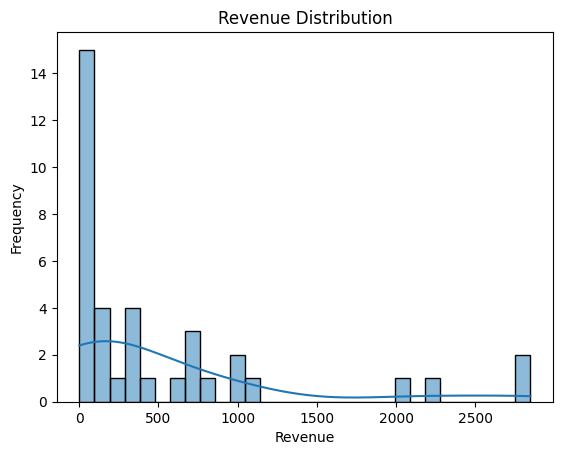

In [1001]:
# Revenue distribution

sns.histplot(df['revenue'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

<li><strong>Top 10 Movies by Revenue:</strong> Bar chart displaying the highest-grossing movies.</li>

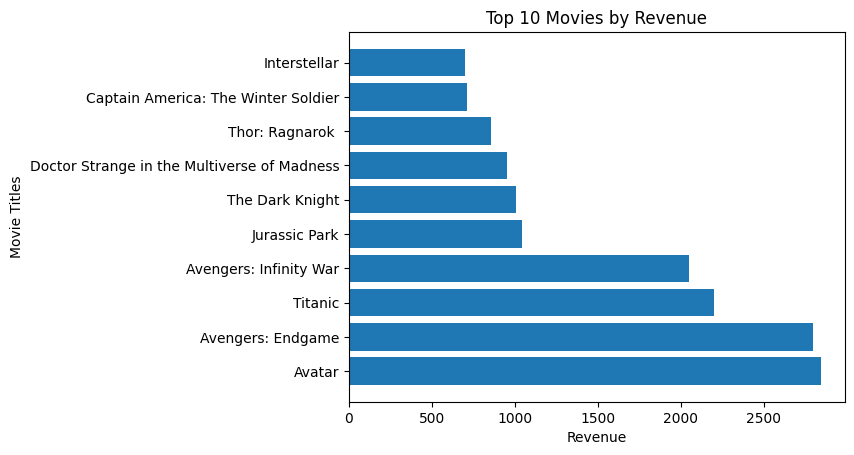

In [1002]:
# Top 10 movies by revenue

top_movies = df.nlargest(10, 'revenue')
plt.barh(top_movies['title'], top_movies['revenue'])
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Titles')
plt.show()

In [1003]:
df.head()

,movie_id,title,industry,language,release_year,imdb_rating,studio,budget,revenue,unit,currency,profit
0,101,K.G.F: Chapter 2,Bollywood,Kannada,2022,8.4,Hombale Films,12.0,150.0,Millions,USD,138.0
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,English,2022,7.0,Marvel Studios,200.0,954.8,Millions,USD,754.8
2,103,Thor: The Dark World,Hollywood,English,2013,6.8,Marvel Studios,165.0,644.8,Millions,USD,479.8
3,104,Thor: Ragnarok,Hollywood,English,2017,7.9,Marvel Studios,180.0,854.0,Millions,USD,674.0
4,105,Thor: Love and Thunder,Hollywood,English,2022,6.8,Marvel Studios,250.0,670.0,Millions,USD,420.0


<li><strong>Correlation Heatmap:</strong> Showcasing relationships between budget, revenue, IMDB Rating, and popularity.</li>

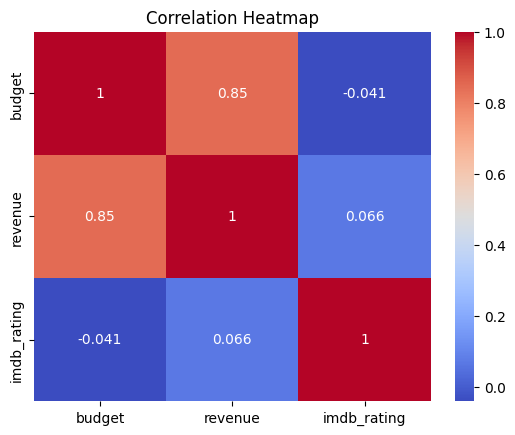

In [1004]:
numerical_features = df[['budget', 'revenue', 'imdb_rating']]
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<li><strong>scatterplot:</strong> scatterplot for showing relation between budget and revenue.</li>

<Axes: title={'center': 'Budget vs Revenue'}, xlabel='budget', ylabel='revenue'>

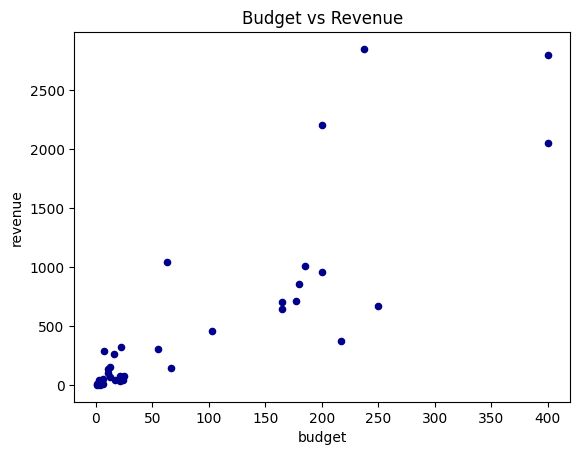

In [1005]:
df.plot.scatter(x='budget', y='revenue', title='Budget vs Revenue', color='Darkblue')

<font color='green'> <h4><strong>5. Conclusion</strong></h4></font>
<ul>
<li>The dataset reveals clear trends in the dominance of<b> Hollywood</b>, with <b>Marvel Studios</b> producing the highest number of hits.</li>
<li>Budget and revenue show a strong correlation, indicating higher budgets often lead to greater revenues.</li>
<li>IMDB ratings provide an essential measure of audience reception, which does not always align with revenue.</li>
<li>Marvel studio of Hollywood and Vinod Chopra Films of Bollywood produced maximum movies.</li>
<li>20th Century Fox of Hollywood and Hombale Films	of Bollywood making highest revenue movie</li>
<li>Marvel studio of Hollywood and Vinod Chopra Films of Bollywood has highest average revenue.</li>
</ul>